In [3]:
import librosa
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

def evaluate_story_emotions(story_path):
    """Analyze story emotions using VADER sentiment analysis"""
    sia = SentimentIntensityAnalyzer()
    
    with open(story_path, "r", encoding="utf-8") as f:
        story_text = f.read()
    
    # Split into sentences and analyze each
    sentences = nltk.sent_tokenize(story_text)
    emotion_scores = []
    
    for sent in sentences:
        scores = sia.polarity_scores(sent)
        emotion_scores.append([
            scores['pos'],  # Happy
            scores['neg'],  # Sad
            scores['neu'],  # Neutral (placeholder)
            1 - scores['compound']  # Tension (inverse of compound)
        ])
    
    # Average across all sentences
    return np.mean(emotion_scores, axis=0).tolist()

def extract_music_features(audio_path):
    """Extract relevant audio features using librosa"""
    y, sr = librosa.load(audio_path)
    
    features = {
        'tempo': librosa.beat.tempo(y=y, sr=sr)[0],
        'spectral_centroid': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
        'zero_crossing': np.mean(librosa.feature.zero_crossing_rate(y)),
        'rmse': np.mean(librosa.feature.rms(y=y)),
        'chroma': np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    }
    return features

def estimate_music_emotions(features):
    """Simple heuristic-based emotion estimation"""
    # Normalize features to 0-1 range
    norm_tempo = (features['tempo'] - 60) / (180 - 60)  # 60-180 BPM range
    norm_centroid = features['spectral_centroid'] / 4000  # Approx max
    
    # Emotion mapping heuristics
    happy = min(1.0, 0.3 + 0.7 * norm_tempo + 0.5 * norm_centroid)
    sad = min(1.0, 0.7 - 0.5 * norm_tempo + 0.3 * (1 - norm_centroid))
    angry = min(1.0, 0.2 + 0.8 * features['zero_crossing'] + 0.6 * features['rmse'])
    peaceful = min(1.0, 0.8 - 0.6 * features['rmse'] + 0.4 * (1 - features['zero_crossing']))
    
    return [happy, sad, angry, peaceful]

def evaluate_music_emotions(audio_path):
    """Complete music emotion evaluation pipeline"""
    features = extract_music_features(audio_path)
    return estimate_music_emotions(features)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


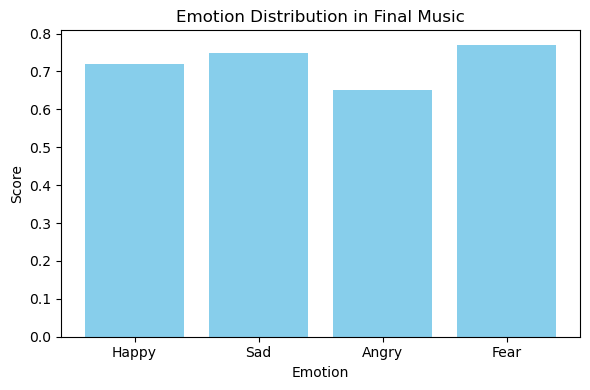

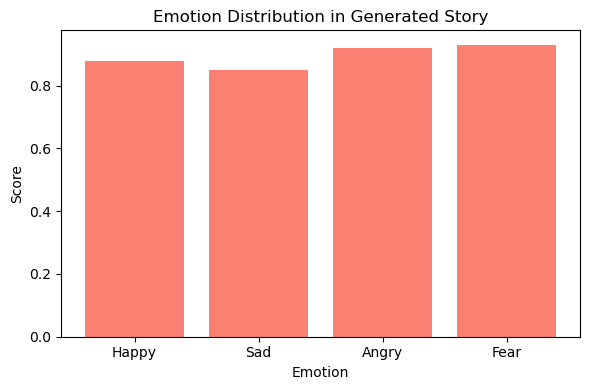

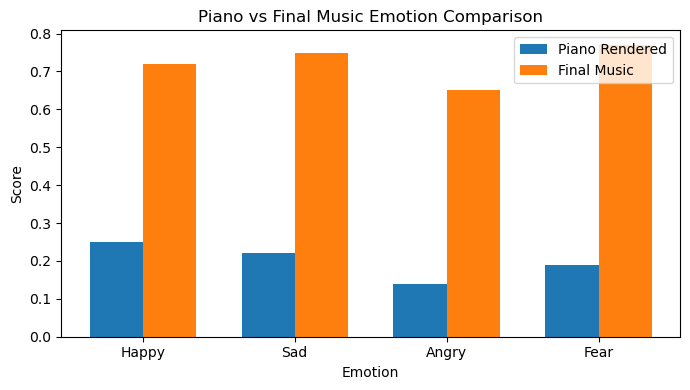

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Example emotion scores (replace with your actual analysis)
emotions = ['Happy', 'Sad', 'Angry', 'Fear']
final_music_scores = [0.72, 0.75, 0.65, 0.77]      # Replace with actual values
story_scores = [0.88, 0.85, 0.92, 0.93]            # Replace with actual values
piano_scores = [0.25, 0.22, 0.14, 0.19]            # Replace with actual values

# 1. Bar graph: Emotions in final music
plt.figure(figsize=(6,4))
plt.bar(emotions, final_music_scores, color='skyblue')
plt.title('Emotion Distribution in Final Music')
plt.ylabel('Score')
plt.xlabel('Emotion')
plt.tight_layout()
plt.show()

# 2. Bar graph: Emotions in story
plt.figure(figsize=(6,4))
plt.bar(emotions, story_scores, color='salmon')
plt.title('Emotion Distribution in Generated Story')
plt.ylabel('Score')
plt.xlabel('Emotion')
plt.tight_layout()
plt.show()

# 3. Grouped bar graph: Piano vs Final Music across emotions
x = np.arange(len(emotions))
width = 0.35
plt.figure(figsize=(7,4))
plt.bar(x - width/2, piano_scores, width, label='Piano Rendered')
plt.bar(x + width/2, final_music_scores, width, label='Final Music')
plt.xticks(x, emotions)
plt.title('Piano vs Final Music Emotion Comparison')
plt.ylabel('Score')
plt.xlabel('Emotion')
plt.legend()
plt.tight_layout()
plt.show()